In [1]:
import requests as r
from bs4 import BeautifulSoup 
import pandas as pd
import plotly.express as px
import plotly.offline as po

In [2]:
url_link = ['https://www.goodfirms.co/big-data-analytics/data-analytics', 
            'https://www.goodfirms.co/big-data-analytics/data-analytics?page=2', 
            'https://www.goodfirms.co/big-data-analytics/data-analytics?page=3']

In [3]:
get_access = [r.get(url) for url in url_link]

In [4]:
get_access

[<Response [200]>, <Response [200]>, <Response [200]>]

In [5]:
for page in get_access:
    index = get_access.index(page) + 1
    with open(f'page{index}.html', mode='wb') as file:
        file.write(page.content)

In [6]:
with open('page1.html', mode='r', encoding='utf8') as file:
    bs = BeautifulSoup(file, 'lxml')

In [7]:
firm_names = bs.find_all('span', {'itemprop': "name"})
firm_motors = bs.find_all('p', {'class': "profile-tagline"})
firm_reviews = bs.find_all('span', {'class': "listinv_review_label"})
progress_value = bs.find_all('div', {'class': "circle-progress-value"})
firm_prices = bs.find_all('div', {'class': "firm-pricing"})
firm_emps = bs.find_all('div', {'class': "firm-employees"})
firm_years = bs.find_all('div', {'class': "firm-founded"})
firm_locations = bs.find_all('div', {'class': "firm-location"})

In [8]:
# Using .text to extract the text values from the tags
def extract_detail(tag_lst):
    lst = [tag.text for tag in tag_lst]
    return pd.Series(lst)

# Every value with an even index reps the service percent
# While the values with an odd index reps the platform percent
def extract_progress_values(tag_lst):    
    service_pct = [percent[1].text for percent in enumerate(tag_lst) if percent[0]%2 ==0]
    platform_pct = [percent[1].text for percent in enumerate(tag_lst) if percent[0]%2 ==1]       
    return pd.Series(service_pct), pd.Series(platform_pct) 

In [9]:
names = extract_detail(firm_names[3:])
motors = extract_detail(firm_motors)
reviews = extract_detail(firm_reviews)
ser, pct = extract_progress_values(progress_value)
prices = extract_detail(firm_prices)
emps = extract_detail(firm_emps)
years = extract_detail(firm_years)
locations = extract_detail(firm_locations)

In [11]:
df1 = pd.DataFrame()

In [12]:
df1['firm_name'] = names
df1['firm_motor'] = motors
df1['firm_review'] = reviews
df1['service_pct'] = ser
df1['platform_pct'] = pct
df1['firm_price'] = prices
df1['firm_employee'] = emps
df1['year_founded'] = years
df1['firm_location'] = locations

In [13]:
df1.head(3)

,firm_name,firm_motor,firm_review,service_pct,platform_pct,firm_price,firm_employee,year_founded,firm_location
0,SPEC INDIA,"Enterprise Software, Mobility & BI Solutions",4.8 (26 Reviews),20%,15%,\n< $25/hr,250 - 999,1987,"\nIndia, United States"
1,instinctools,Delivering the future. Now.,4.8 (8 Reviews),5%,10%,\n$50 - $99/hr,250 - 999,2000,"\nUnited States, Germany"
2,SoluLab,Blockchain | IoT | Mobility | AI | Big Data,5.0 (32 Reviews),15%,15%,\n$25 - $49/hr,50 - 249,2014,"\nUnited States, India"


In [14]:
# Open page 2
with open("page2.html", encoding='utf-8', mode='r') as file:
    bs2 = BeautifulSoup(file, 'lxml')
    
# Locate details
firm_names = bs2.find_all('span', {'itemprop': "name"})
firm_motors = bs2.find_all('p', {'class': "profile-tagline"})
firm_reviews = bs2.find_all('span', {'class': "listinv_review_label"})
progress_value = bs2.find_all('div', {'class': "circle-progress-value"})
firm_prices = bs2.find_all('div', {'class': "firm-pricing"})
firm_emps = bs2.find_all('div', {'class': "firm-employees"})
firm_years = bs2.find_all('div', {'class': "firm-founded"})
firm_locations = bs2.find_all('div', {'class': "firm-location"})

# Extract details
names2 = extract_detail(firm_names[3:])
motors = extract_detail(firm_motors)
reviews = extract_detail(firm_reviews)
ser, pct = extract_progress_values(progress_value)
prices = extract_detail(firm_prices)
emps = extract_detail(firm_emps)
years = extract_detail(firm_years)
locations = extract_detail(firm_locations)

# Put details in a dataframe
df2 = pd.DataFrame()

df2['firm_name'] = names2
df2['firm_motor'] = motors
df2['firm_review'] = reviews
df2['service_pct'] = ser
df2['platform_pct'] = pct
df2['firm_price'] = prices
df2['firm_employee'] = emps
df2['year_founded'] = years
df2['firm_location'] = locations

# Preview
df2.head()

,firm_name,firm_motor,firm_review,service_pct,platform_pct,firm_price,firm_employee,year_founded,firm_location
0,SemiDot Infotech Pvt Ltd,Right Technology Partner for IT Solutions,4.7 (7 Reviews),10%,30%,\n< $25/hr,50 - 249,2011,"\nUnited States, India"
1,Sphinx Solutions,Inspire : Innovate : Evolve,4.6 (8 Reviews),5%,10%,\n< $25/hr,Freelancer,2010,"\nIndia, United States"
2,Redian Software,Delivering Open Source Solutions,5.0 (5 Reviews),10%,50%,\n$25 - $49/hr,10 - 49,2016,"\nUnited Kingdom, India"
3,Indus Net Technologies,We Deliver Digital Success,5.0 (5 Reviews),10%,50%,\n< $25/hr,250 - 999,1997,"\nIndia, United Kingdom"
4,RWaltz Group Inc.,Blockchain Solutions Experts,5.0 (5 Reviews),10%,50%,\n$50 - $99/hr,50 - 249,2000,\nUnited States


In [15]:
# Open page 3 
with open("page3.html", encoding='utf-8', mode='r') as file:
    bs3 = BeautifulSoup(file, 'lxml')
    
# Locate details
firm_names = bs3.find_all('span', {'itemprop': "name"})
firm_motors = bs3.find_all('p', {'class': "profile-tagline"})
firm_reviews = bs3.find_all('span', {'class': "listinv_review_label"})
progress_value = bs3.find_all('div', {'class': "circle-progress-value"})
firm_prices = bs3.find_all('div', {'class': "firm-pricing"})
firm_emps = bs3.find_all('div', {'class': "firm-employees"})
firm_years = bs3.find_all('div', {'class': "firm-founded"})
firm_locations = bs3.find_all('div', {'class': "firm-location"})

# Extract details
names = extract_detail(firm_names[3:])
motors = extract_detail(firm_motors)
reviews = extract_detail(firm_reviews)
ser, pct = extract_progress_values(progress_value)
prices = extract_detail(firm_prices)
emps = extract_detail(firm_emps)
years = extract_detail(firm_years)
locations = extract_detail(firm_locations)

# Put details in a dataframe
df3 = pd.DataFrame()
df3['firm_name'] = names
df3['firm_motor'] = motors
df3['firm_review'] = reviews
df3['service_pct'] = ser
df3['platform_pct'] = pct
df3['firm_price'] = prices
df3['firm_employee'] = emps
df3['year_founded'] = years
df3['firm_location'] = locations

# Preview
df3.head()

,firm_name,firm_motor,firm_review,service_pct,platform_pct,firm_price,firm_employee,year_founded,firm_location
0,Starkflow,#1 platform for hiring SaaS talent globally.,5.0 (2 Reviews),10%,20%,\n$100 - $149/hr,10 - 49,2017,"\nUnited States, Ukraine"
1,ExpertsFromIndia,We Make IT Possible,5.0 (2 Reviews),2%,25%,\n$25 - $49/hr,250 - 999,2003,"\nUnited States, India"
2,Volumetree,Impact Through Technology,5.0 (2 Reviews),20%,10%,\n$25 - $49/hr,50 - 249,2017,"\nIndia, South Africa"
3,QuadLogix Technologies Pvt. Ltd.,Next-Gen Technology Solutions,5.0 (2 Reviews),5%,20%,\n$25 - $49/hr,10 - 49,2009,"\nIndia, United Arab Emirates"
4,WOXAPP,Mobile applications for startups and businesses,5.0 (2 Reviews),5%,20%,\n$25 - $49/hr,10 - 49,2011,\nUkraine


In [16]:
all_df = pd.concat([df1, df2, df3], ignore_index=True)

In [17]:
all_df

,firm_name,firm_motor,firm_review,service_pct,platform_pct,firm_price,firm_employee,year_founded,firm_location
0,SPEC INDIA,"Enterprise Software, Mobility & BI Solutions",4.8 (26 Reviews),20%,15%,\n< $25/hr,250 - 999,1987,"\nIndia, United States"
1,instinctools,Delivering the future. Now.,4.8 (8 Reviews),5%,10%,\n$50 - $99/hr,250 - 999,2000,"\nUnited States, Germany"
2,SoluLab,Blockchain | IoT | Mobility | AI | Big Data,5.0 (32 Reviews),15%,15%,\n$25 - $49/hr,50 - 249,2014,"\nUnited States, India"
3,Sigma Data Systems,Discover the world of Big Data with us!,4.7 (5 Reviews),40%,10%,\n$25 - $49/hr,250 - 999,2010,"\nUnited States, Australia"
4,NeenOpal Inc.,The Hub Of Data Science Innovation,5.0 (5 Reviews),25%,10%,\n$25 - $49/hr,10 - 49,2016,"\nUnited States, India"
...,...,...,...,...,...,...,...,...,...
157,Right Information,Perfect match when standard software is not en...,0.0 (0 Review),10%,50%,\n $50 - $99/hr,10 - 49,2001,\nPoland
158,ISHIR Secure,"ISHIR Secure, a managed security services prov...",0.0 (0 Review),20%,40%,\nNA,50 - 249,1999,\nUnited States
159,"BrookeWealth Global, LLC",Business Consultants. Creating Value.,0.0 (0 Review),50%,15%,\n$100 - $149/hr,2 - 9,2019,\nUnited States
160,Easy Code LTD,bespoke software solutions,0.0 (0 Review),5%,50%,\n$100 - $149/hr,2 - 9,2016,\nUnited Kingdom


## Data Cleaning 

In [18]:
values = all_df['firm_review'].apply(lambda x: x.strip()[:4])
all_df.insert(3, 'star_rating', values)

In [19]:
values2 = all_df['firm_review'].apply(lambda x: x.split()[1].strip('('))
all_df.insert(4, 'firm_rev', values2)

In [20]:
del all_df['firm_review']

In [21]:
all_df['service_pct'] = all_df['service_pct'].apply(lambda x: x.strip('%'))
all_df['platform_pct'] = all_df['platform_pct'].apply(lambda x: x.strip('%'))

In [22]:
all_df.rename(columns={'service_pct': 'service_pct(%)', 'platform_pct': 'platform_pct(%)'}, inplace=True)

In [23]:
all_df['firm_price'] = all_df['firm_price'].apply(lambda x: x.strip('\n'))
all_df['firm_location'] = all_df['firm_location'].apply(lambda x: x.strip('\n'))

In [24]:
all_df.head(1)

,firm_name,firm_motor,star_rating,firm_rev,service_pct(%),platform_pct(%),firm_price,firm_employee,year_founded,firm_location
0,SPEC INDIA,"Enterprise Software, Mobility & BI Solutions",4.8,26,20,15,< $25/hr,250 - 999,1987,"India, United States"


In [25]:
all_df.dtypes

firm_name          object
firm_motor         object
star_rating        object
firm_rev           object
service_pct(%)     object
platform_pct(%)    object
firm_price         object
firm_employee      object
year_founded       object
firm_location      object
dtype: object

In [26]:
all_df['star_rating'] = all_df['star_rating'].astype('float')
all_df['firm_rev'] = all_df['firm_rev'].astype('int')
all_df['service_pct(%)'] = all_df['service_pct(%)'].astype('int')
all_df['platform_pct(%)'] = all_df['platform_pct(%)'].astype('int')

In [27]:
all_df.dtypes

firm_name           object
firm_motor          object
star_rating        float64
firm_rev             int32
service_pct(%)       int32
platform_pct(%)      int32
firm_price          object
firm_employee       object
year_founded        object
firm_location       object
dtype: object

## EDA

In [28]:
all_df.head(1)

,firm_name,firm_motor,star_rating,firm_rev,service_pct(%),platform_pct(%),firm_price,firm_employee,year_founded,firm_location
0,SPEC INDIA,"Enterprise Software, Mobility & BI Solutions",4.8,26,20,15,< $25/hr,250 - 999,1987,"India, United States"


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='star_rating', ylabel='Count'>

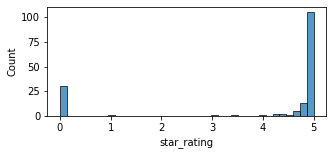

In [30]:
plt.figure(figsize=(5,2))
sns.histplot(data= all_df, x='star_rating')

<AxesSubplot:xlabel='firm_rev', ylabel='Count'>

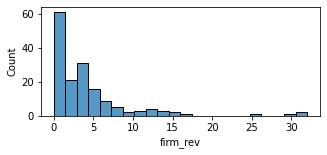

In [31]:
plt.figure(figsize=(5,2))
sns.histplot(data=all_df, x='firm_rev')

In [32]:
split = all_df['firm_location'].apply(lambda x: x.split(', '))
lst = []
for x in split:
    lst += x
    
new_lst = []
for x in lst:
    new_lst.append(x.strip())
locations = pd.Series(new_lst).value_counts(ascending=True)
locations[:5]

Brazil          1
Malta           1
Armenia         1
Bulgaria        1
Saudi Arabia    1
dtype: int64

In [33]:
all_df.head(20)

,firm_name,firm_motor,star_rating,firm_rev,service_pct(%),platform_pct(%),firm_price,firm_employee,year_founded,firm_location
0,SPEC INDIA,"Enterprise Software, Mobility & BI Solutions",4.8,26,20,15,< $25/hr,250 - 999,1987,"India, United States"
1,instinctools,Delivering the future. Now.,4.8,8,5,10,$50 - $99/hr,250 - 999,2000,"United States, Germany"
2,SoluLab,Blockchain | IoT | Mobility | AI | Big Data,5.0,32,15,15,$25 - $49/hr,50 - 249,2014,"United States, India"
3,Sigma Data Systems,Discover the world of Big Data with us!,4.7,5,40,10,$25 - $49/hr,250 - 999,2010,"United States, Australia"
4,NeenOpal Inc.,The Hub Of Data Science Innovation,5.0,5,25,10,$25 - $49/hr,10 - 49,2016,"United States, India"
5,CodeCompletePro,IT Outsourcing Services,5.0,1,20,5,$50 - $99/hr,10 - 49,2021,United States
6,Consagous Technologies,Helping brands by being their Technology Partner,4.8,32,10,20,$25 - $49/hr,50 - 249,2008,"India, United States"
7,NEX Softsys,IT Partner for Global Clients,5.0,12,20,20,$25 - $49/hr,50 - 249,2003,United States
8,Beyond Key,IT Consulting and Software Development Services,5.0,7,20,10,$25 - $49/hr,250 - 999,2005,"United States, India"
9,Datapine,BUSINESS INTELLIGENCE MADE EASY,5.0,3,90,5,$50 - $99/hr,10 - 49,2012,Germany


In [34]:
all_df.tail(20)

,firm_name,firm_motor,star_rating,firm_rev,service_pct(%),platform_pct(%),firm_price,firm_employee,year_founded,firm_location
142,SEVEN,The Company That Exceeds Your Expectations,0.0,0,6,80,$25 - $49/hr,50 - 249,2007,Ukraine
143,FreshDataLabs,Getting the leads has never been this easy,0.0,0,50,40,$50 - $99/hr,10 - 49,2018,India
144,HTML Pro,NYC’s Top IT Solutions & Digital Agency,1.0,1,10,30,$50 - $99/hr,50 - 249,2013,United States
145,Juice analytics,Serve up your data the way customers need it,0.0,0,70,20,$50 - $99/hr,10 - 49,2004,United States
146,Salpo Technologies,Listen. Learn. Innovate.,0.0,0,30,50,NA,50 - 249,2007,United Kingdom
147,Dataentryindia.in,IT Outsourcing Services,0.0,0,25,50,NA,250 - 999,1999,"United States, India"
148,element61,experience & expertise - Thought-leading Analy...,0.0,0,80,5,$100 - $149/hr,50 - 249,2007,Belgium
149,Tectoro Consulting Pvt Ltd,Capital Markets Technology Solutions,0.0,0,20,50,$25 - $49/hr,50 - 249,2015,"India, Singapore"
150,Rock Your Data,Delivering Cloud Analytics that Rocks Your Data,0.0,0,70,10,$150 - $199/hr,10 - 49,2017,Canada
151,CodeRiders,We desire. Together we achieve!,0.0,0,15,50,$25 - $49/hr,10 - 49,2013,Armenia
